In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.rc('font', size=14)
#import seaborn as sns
#sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(11,8)}, font_scale=2)

from sklearn.cluster import KMeans

In [2]:
_DATA_DIR = '/classes/2080001_spr2022/Data'

# K-means example


## Generate Data

In [3]:
def show_clusters(kmeans,X,iteration):
    y=kmeans.predict(X)
    plt.figure(figsize = (8,6))
    edgecolor=['blue','red','green',"magenta"]
    plt.title(f"WCV = {round(kmeans.inertia_,2)}")
    for i in range(kmeans.n_clusters):
        plt.plot(X[y==i,0],X[y==i,1],'o',markerfacecolor="none", markeredgecolor=edgecolor[i],markersize=6)
        plt.plot(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],'o',markeredgecolor="black",markerfacecolor=edgecolor[i],markersize=10)
        plt.savefig('k_means_%s.pdf'%(iteration+1))

In [4]:
np.random.seed(0)
Xg1 =  0.15*np.random.randn(100,2)
Xg2 =  0.2 *np.random.randn(100,2) + [0,1];
Xg3 =  0.25*np.random.randn(100,2) + [1,1];
X   =  np.vstack((Xg1,Xg2,Xg3))
ii  =  np.array(range(X.shape[0]))
np.random.shuffle(ii)
X   =  X[ii]

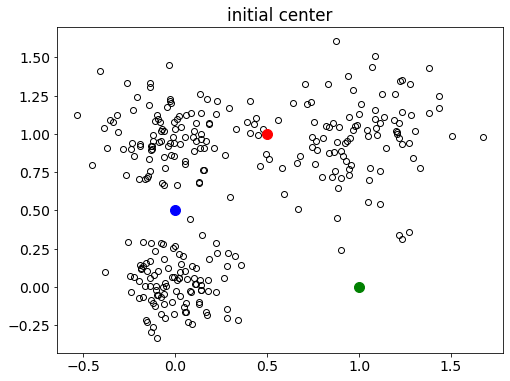

In [5]:
plt.figure(figsize = (8,6))
plt.plot(Xg1[:,0],Xg1[:,1],'o',markerfacecolor="none", markeredgecolor='black',markersize=6)
plt.plot(Xg2[:,0],Xg2[:,1],'o', markerfacecolor="none",markeredgecolor='black',markersize=6)
plt.plot(Xg3[:,0],Xg3[:,1],'o', markerfacecolor="none",markeredgecolor='black',markersize=6)
plt.plot(0,0.5,'o',color = 'blue',markersize=10)
plt.plot(0.5,1,'o',color="red",markersize=10)
plt.plot(1,0,'o',color="green",markersize=10)
plt.title("initial center")
plt.savefig('k_means_0.pdf')
plt.show()

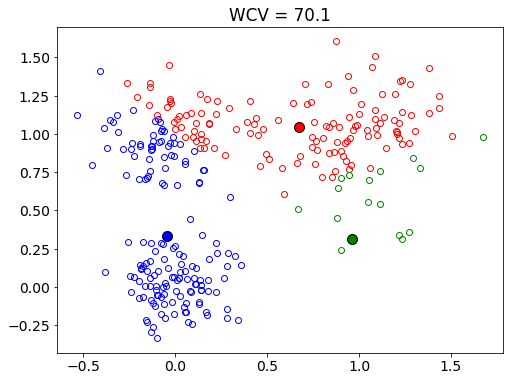

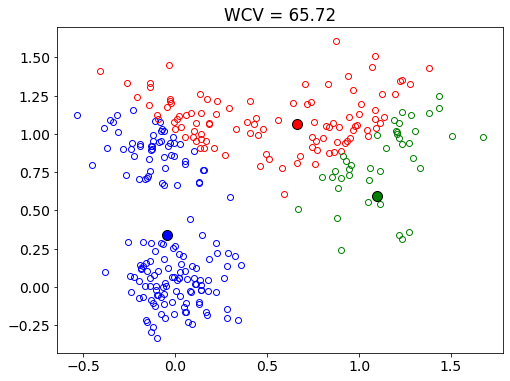

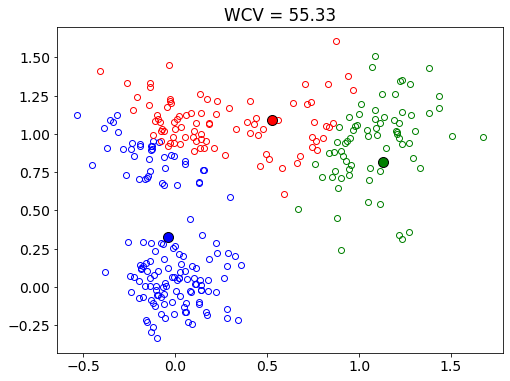

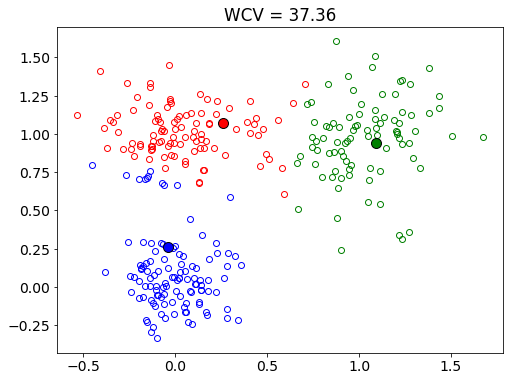

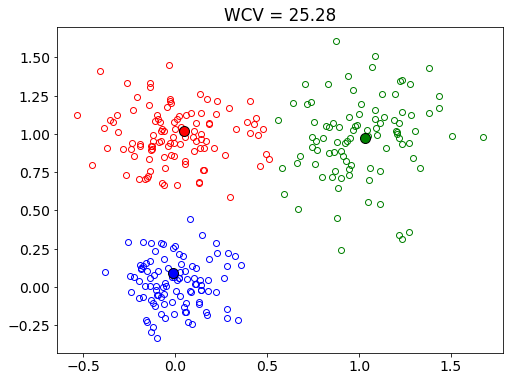

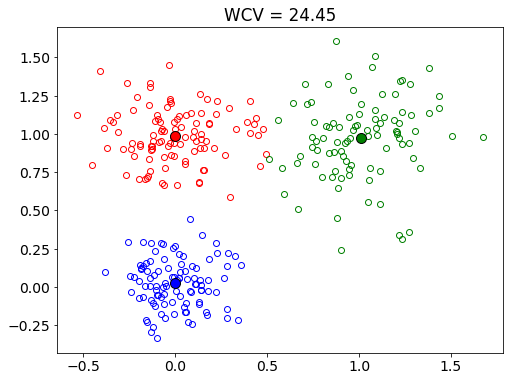

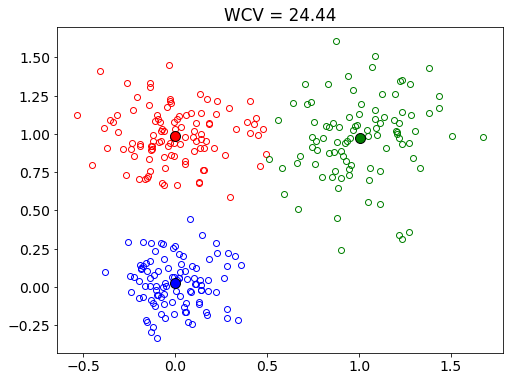

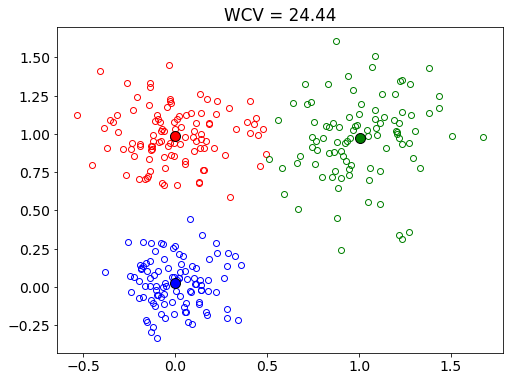

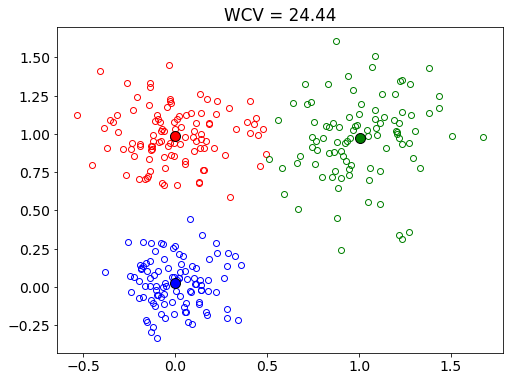

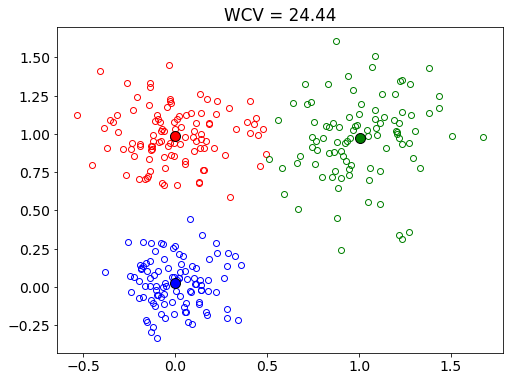

In [6]:
init_centers=np.array([[0,0.5],[0.5,1],[1,0]])
num_iters=10
for i in range(num_iters):
    kmeans = KMeans(n_clusters=3,init=init_centers,n_init=1,max_iter=1)
    kmeans.fit(X)
    show_clusters(kmeans,X,i)
    init_centers=kmeans.cluster_centers_

In [7]:
np.around(kmeans.cluster_centers_,2)

array([[ 0.  ,  0.03],
       [-0.  ,  0.99],
       [ 1.01,  0.97]])

In [8]:
Counter(kmeans.labels_)

Counter({0: 101, 1: 105, 2: 94})

In [9]:
round(kmeans.inertia_,2)

24.44

# K-means example,  multiple runs

## Generate data

In [10]:
np.random.seed(0)
Xg1 =  0.15*np.random.randn(60,2)
Xg2 =  0.2*np.random.randn(60,2) + [0.25,0.5];
Xg3 =  0.2*np.random.randn(60,2) + [1,0];
Xg4  = 0.2*np.random.randn(70,2) + [1,1];
X=np.vstack((Xg1,Xg2,Xg3,Xg4))
ii=np.array(range(X.shape[0]))
np.random.shuffle(ii)
X=X[ii]

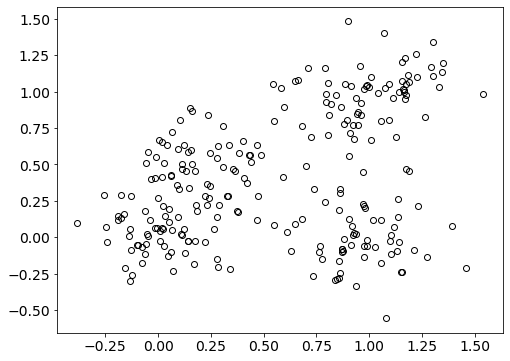

In [11]:
plt.figure(figsize = (8,6))
plt.plot(X[:,0],X[:,1],'o',markerfacecolor="none", markeredgecolor='black',markersize=6)
plt.show()

## n = 250, K = 4, Try different initial centers


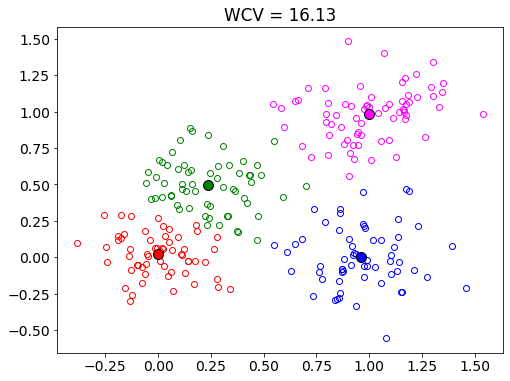

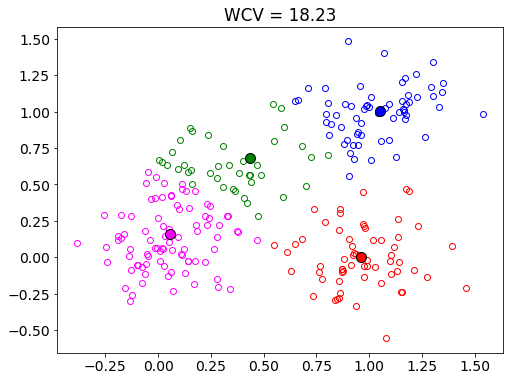

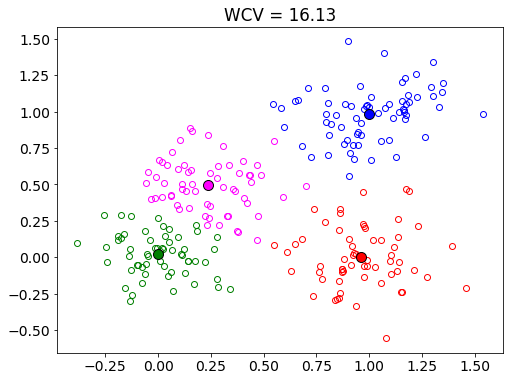

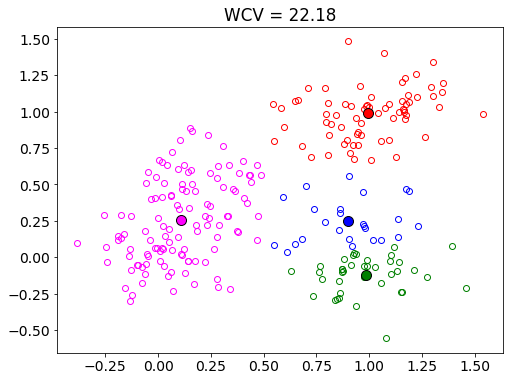

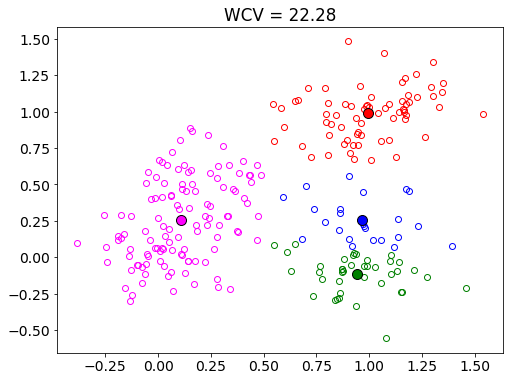

In [12]:
np.random.seed(100)
for i in range(5):        
    kmeans=KMeans(n_clusters=4,init='random',n_init=1,max_iter=10)
    kmeans.fit(X)
    show_clusters(kmeans,X,i)
    init_centers=kmeans.cluster_centers_

# MNIST Data

### load data

In [13]:
raw_data = np.load('%s/MNIST_data.npy'%(_DATA_DIR))
label    = np.load('%s/MNIST_labels.npy'%(_DATA_DIR))
data = raw_data/255

In [14]:
data.shape

(70000, 784)

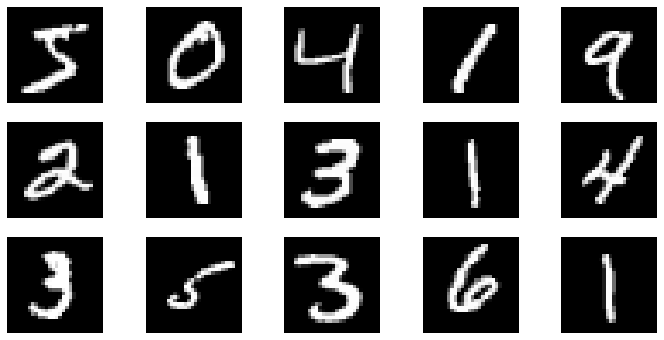

In [15]:
nrows = 3;
ncols = 5;
plt.figure(figsize = (12, 6))
for i in range(nrows*ncols):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(data[i].reshape((28,28)), cmap = 'gray')
    plt.axis('off')
plt.savefig('MNIST_ex.pdf')    
plt.show()

### Split training and testing data set

In [16]:
train_X = data[:60000]
test_X = data[60000:]
train_label = label[:60000]
test_label = label[60000:]

### Training KMeans with K = 10

In [17]:
K = 10
model = KMeans(n_clusters = K)
digit_model = model.fit(train_X)
predict_cluster = digit_model.predict(train_X)


### Model Diagnosis

In [18]:
def diagnosis_MNIST(K, predict_cluster):
### plot center of cluster
    plt.figure(figsize = (10,(K//5)*2))
    plt.rc('font', size=10)
    cluster_digit_label = []
    print('The center of each cluster')
    for i in range(K):
        plt.subplot(K//5,5,i+1)
        plt.imshow(digit_model.cluster_centers_[i].reshape((28,28)), cmap = 'gray')
        plt.axis('off')
        cluster_points_label = train_label[predict_cluster == i]
        label = np.argmax(np.bincount(cluster_points_label))
        cluster_digit_label.append(label)
        plt.title(f'Digit Label = {label}')
    plt.show()
    
    ### Use marjority label of the cluster as the cluster label and calculate accuracy on train data
    correct_point_number = 0
    for i in range(K):
        plt.figure(figsize = (10,4))
        predict_label = cluster_digit_label[i]
        print(f'The majority label of each cluster: {predict_label}')
        cluster_points_label = train_label[predict_cluster == i]
        cluster_points = train_X[predict_cluster == i]
        correct_point_number += sum(cluster_points_label == predict_label)
        n = len(cluster_points)
        
        ### show 10 figure of each cluster
        for j in range(10):
            idx = np.random.randint(n)
            point = cluster_points[idx]
            true_label = cluster_points_label[idx]
            plt.subplot(2,5,j+1)
            plt.imshow(point.reshape((28,28)), cmap = 'gray')
            plt.axis('off')
            label = np.argmax(np.bincount(cluster_points_label))
            plt.title(f'True Label = {true_label}')
        plt.show()
        
    accuracy = correct_point_number/train_X.shape[0]
    
    print("If using the majority label in the clusters as the predicted label, ",
          "the model has the accuracy of :", np.round(accuracy * 100, 4), 
          "% on training data set.")
    
    ### accuracy on test data
    correct_point_number = 0
    predicted_test_label = digit_model.predict(test_X)
    for i in range(K):
        predict_label = cluster_digit_label[i]
        cluster_points_label = test_label[predicted_test_label == i]
        cluster_points = test_X[predicted_test_label == i]
        correct_point_number += sum(cluster_points_label == predict_label)
    accuracy = correct_point_number/test_X.shape[0]
    
    print("If using the majority label in the clusters as the predicted label, ",
          "the model has the accuracy of :", np.round(accuracy * 100, 4), 
          "% on testing data set.")

The center of each cluster


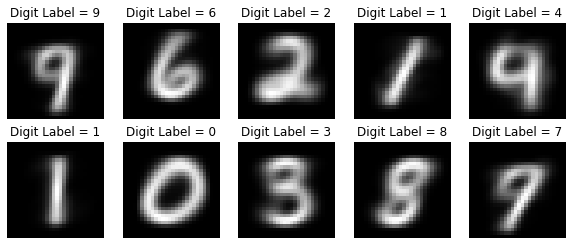

The majority label of each cluster: 9


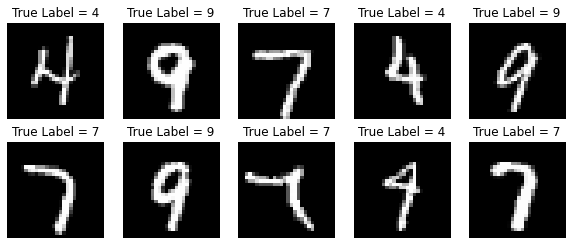

The majority label of each cluster: 6


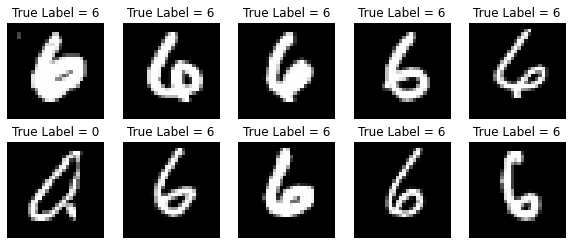

The majority label of each cluster: 2


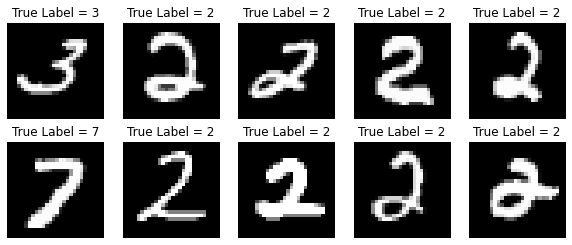

The majority label of each cluster: 1


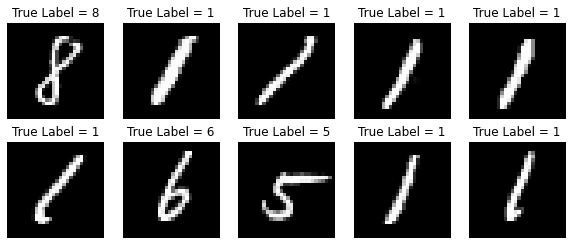

The majority label of each cluster: 4


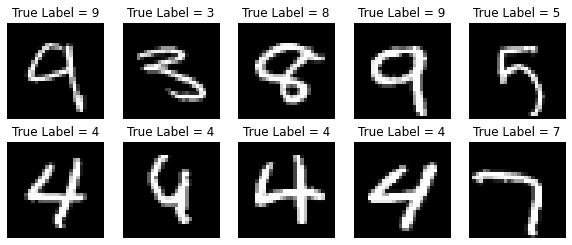

The majority label of each cluster: 1


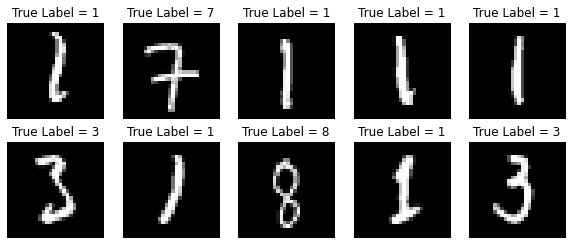

The majority label of each cluster: 0


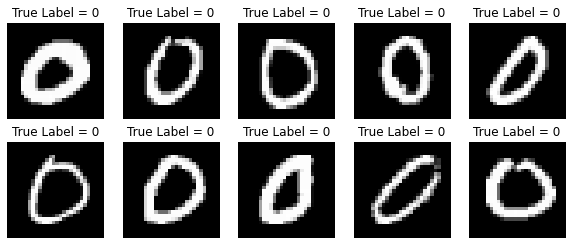

The majority label of each cluster: 3


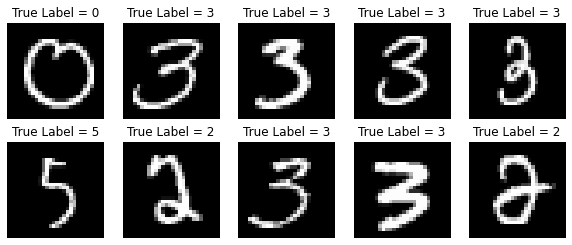

The majority label of each cluster: 8


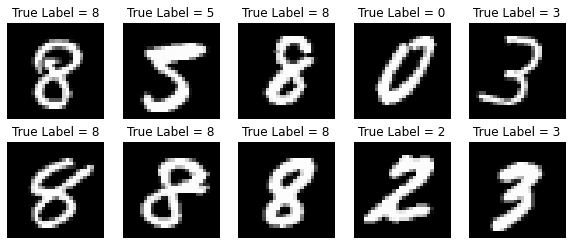

The majority label of each cluster: 7


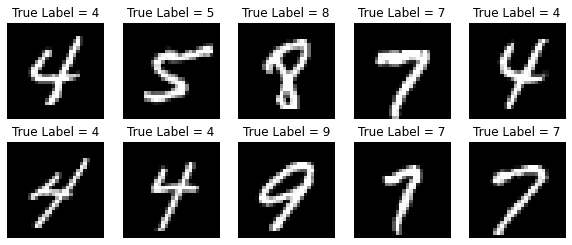

If using the majority label in the clusters as the predicted label,  the model has the accuracy of : 57.9133 % on training data set.
If using the majority label in the clusters as the predicted label,  the model has the accuracy of : 59.45 % on testing data set.


In [19]:
diagnosis_MNIST(10, predict_cluster)

### Select K by AIC and BIC 

In [20]:
def get_bic(k):
    grp = KMeans(n_clusters= k)
    grp.fit(train_X)
    bic = grp.inertia_ + k*train_X.shape[1]*np.log(train_X.shape[0])
    return bic

  0%|          | 0/5 [00:00<?, ?it/s]

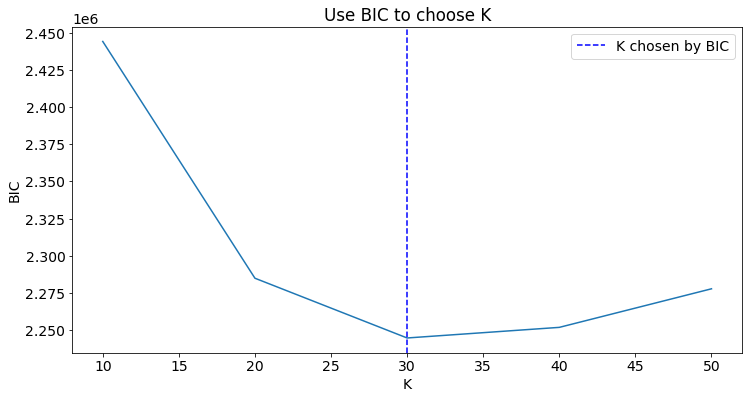

In [21]:
BIC = []
for k in  tqdm(range(10, 60, 10)):
    bic = get_bic(k)
    BIC.append(bic)
    
plt.figure(figsize = (12,6))
plt.rc('font', size=14)
plt.plot(np.arange(10,60,10),BIC)
ks = np.arange(10,60,10)
k_min = ks[np.argmin(BIC)]
plt.axvline(k_min,linestyle='--', color='b',
            label='K chosen by BIC')
plt.xlabel("K")
plt.ylabel("BIC")
plt.title("Use BIC to choose K")
plt.legend()
plt.show()

In [22]:
def get_aic(k):
    grp = KMeans(n_clusters= k)
    grp.fit(train_X)
    aic = grp.inertia_ + 2*k*train_X.shape[1]
    return aic 

  0%|          | 0/7 [00:00<?, ?it/s]

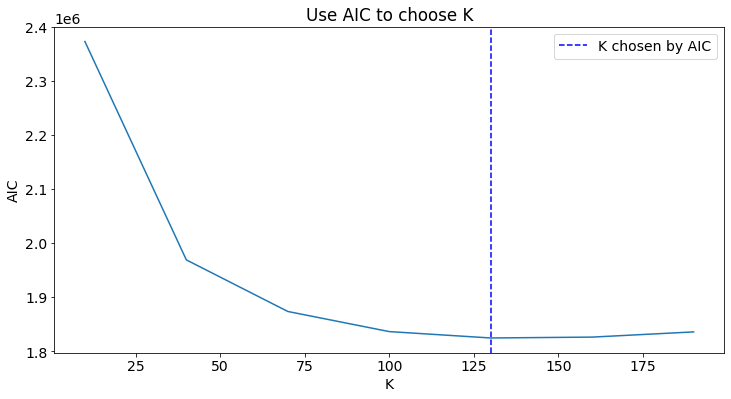

In [23]:
AIC = []
for k in  tqdm(range(10, 200, 30)):
    aic = get_aic(k)
    AIC.append(aic)
    
plt.figure(figsize = (12,6))
plt.rc('font', size=14)
plt.plot(np.arange(10,200,30),AIC)
ks = np.arange(10,200,30)
k_min = ks[np.argmin(AIC)]
plt.axvline(k_min,linestyle='--', color='b',
            label='K chosen by AIC')
plt.xlabel("K")
plt.ylabel("AIC")
plt.title("Use AIC to choose K")
plt.legend()
plt.show()

In [24]:
k_min

130

### Train a model with larger K

In [25]:
K = 30
model = KMeans(n_clusters = K)
digit_model = model.fit(train_X)
predict_cluster = digit_model.predict(train_X)

The center of each cluster


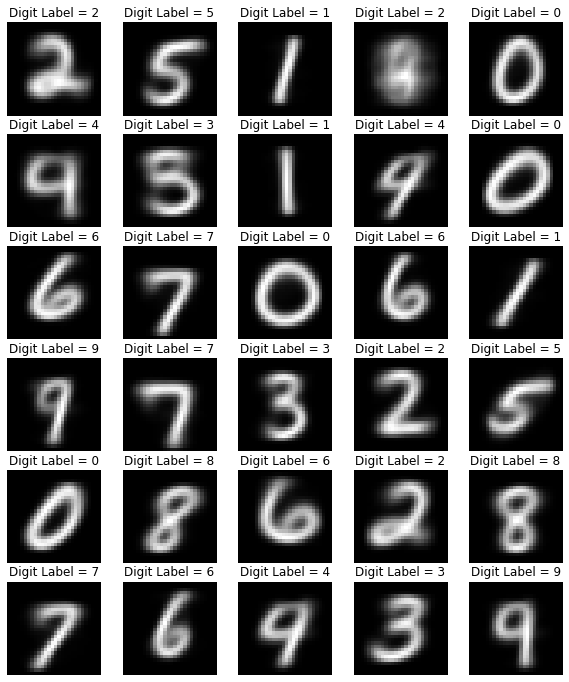

The majority label of each cluster: 2


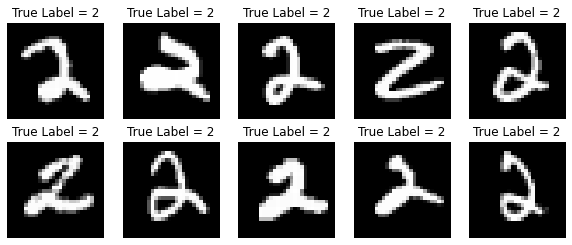

The majority label of each cluster: 5


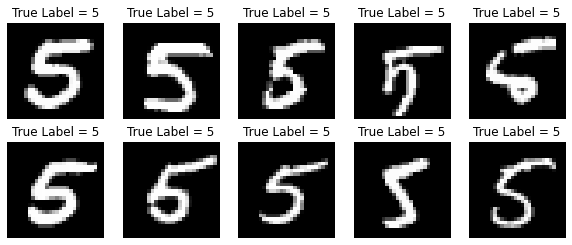

The majority label of each cluster: 1


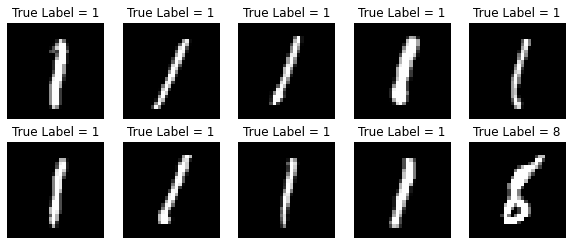

The majority label of each cluster: 2


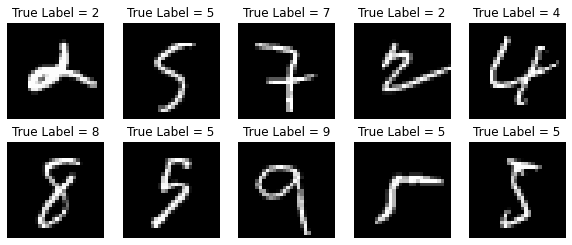

The majority label of each cluster: 0


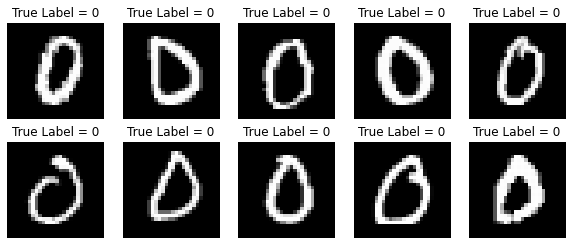

The majority label of each cluster: 4


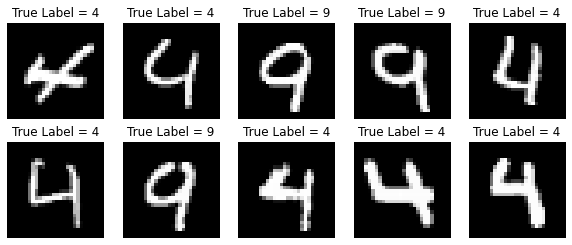

The majority label of each cluster: 3


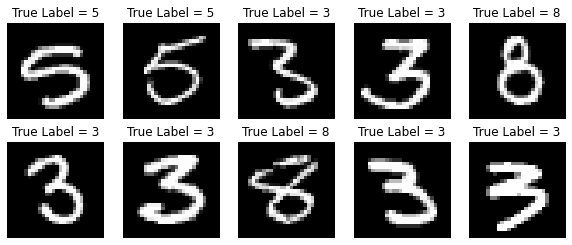

The majority label of each cluster: 1


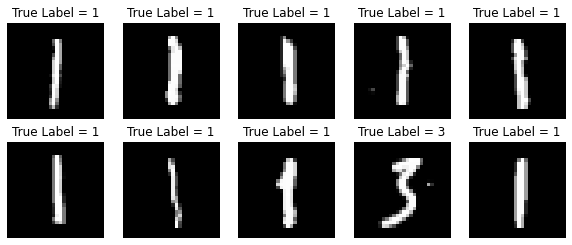

The majority label of each cluster: 4


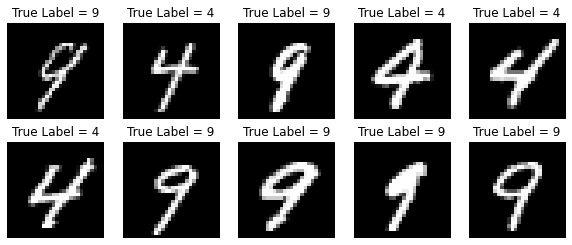

The majority label of each cluster: 0


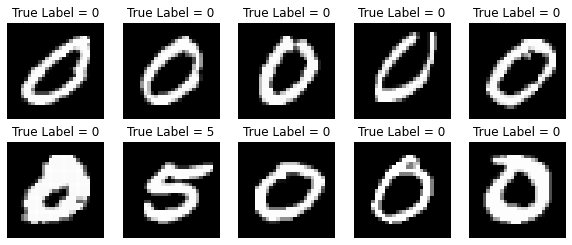

The majority label of each cluster: 6


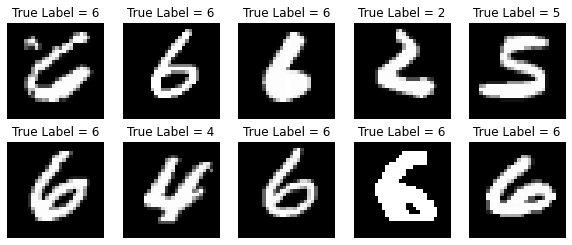

The majority label of each cluster: 7


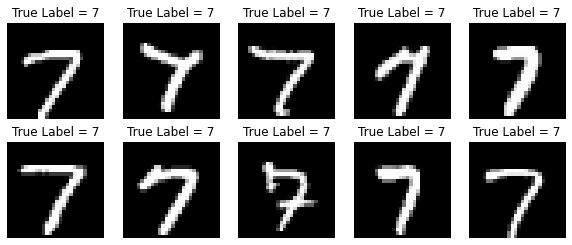

The majority label of each cluster: 0


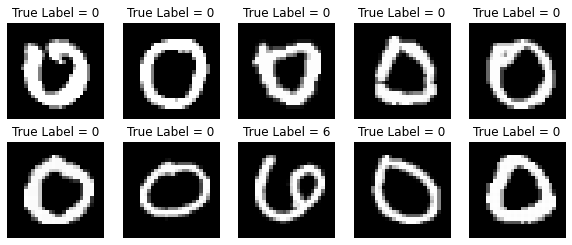

The majority label of each cluster: 6


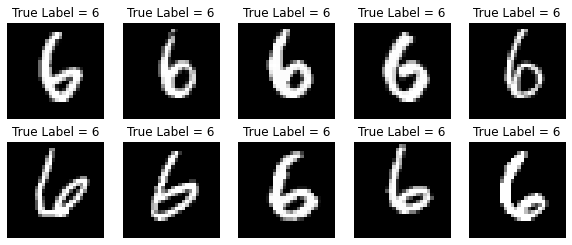

The majority label of each cluster: 1


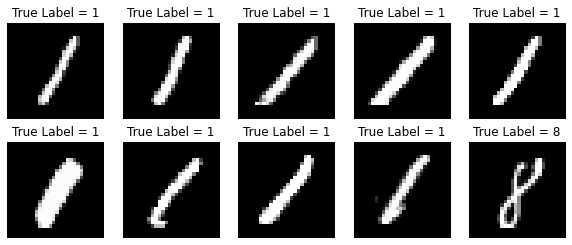

The majority label of each cluster: 9


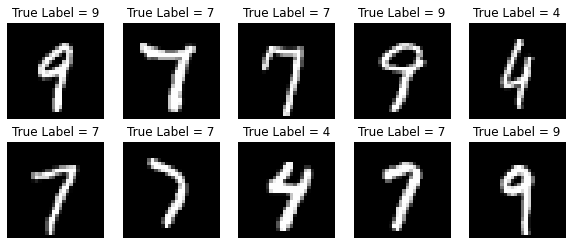

The majority label of each cluster: 7


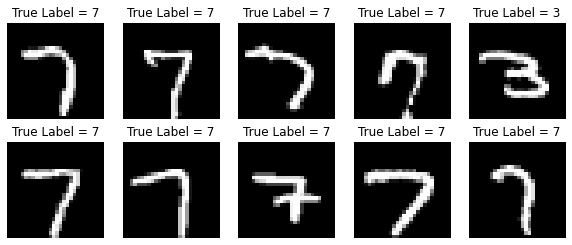

The majority label of each cluster: 3


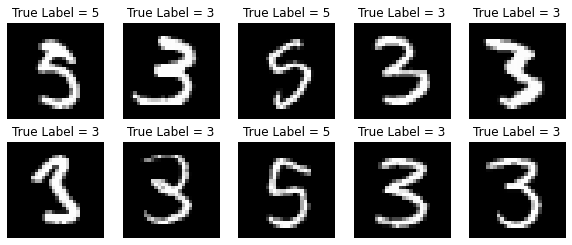

The majority label of each cluster: 2


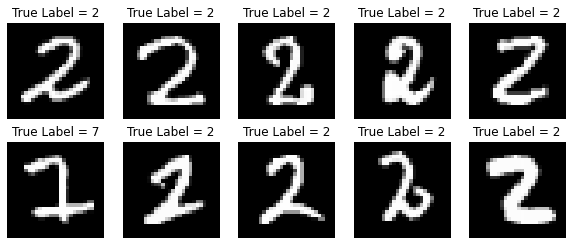

The majority label of each cluster: 5


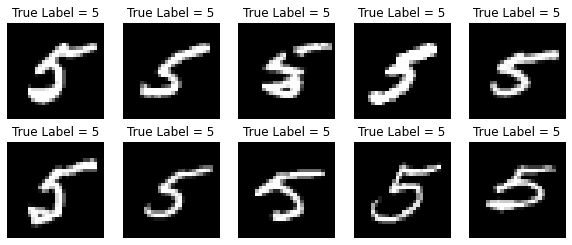

The majority label of each cluster: 0


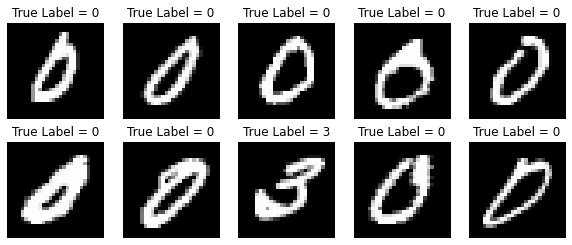

The majority label of each cluster: 8


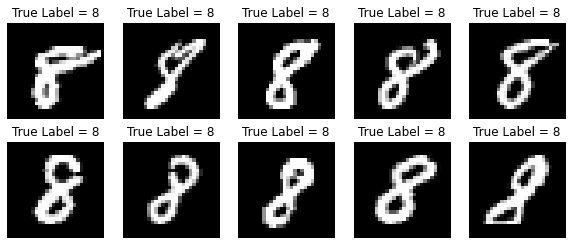

The majority label of each cluster: 6


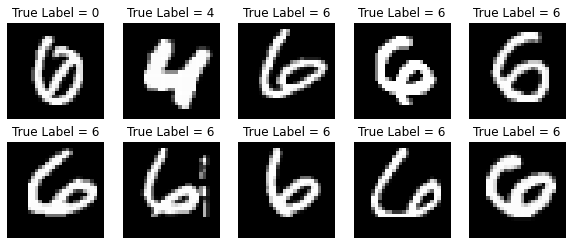

The majority label of each cluster: 2


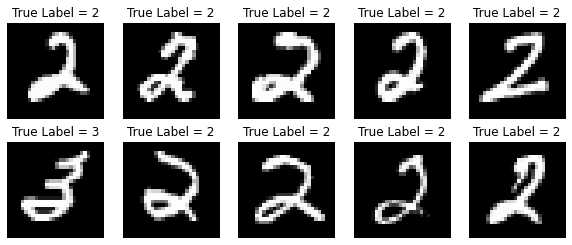

The majority label of each cluster: 8


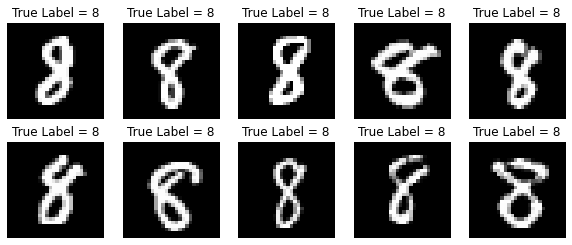

The majority label of each cluster: 7


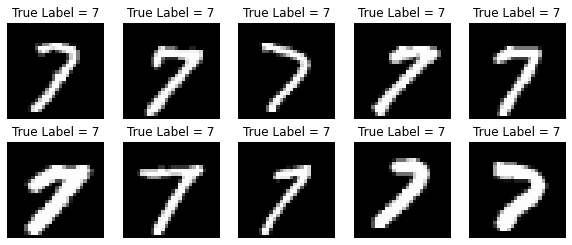

The majority label of each cluster: 6


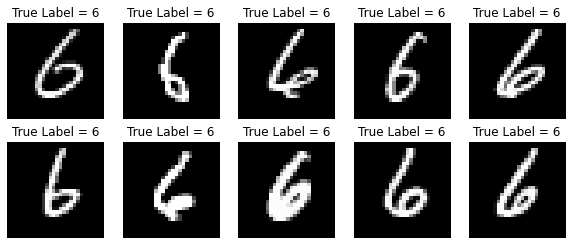

The majority label of each cluster: 4


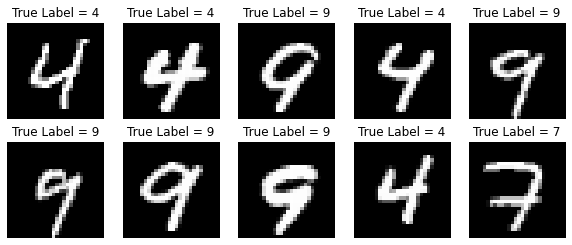

The majority label of each cluster: 3


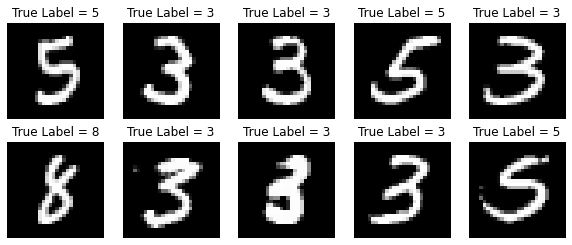

The majority label of each cluster: 9


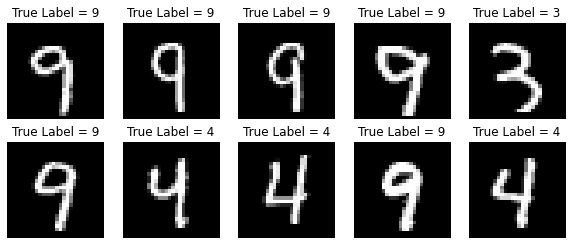

If using the majority label in the clusters as the predicted label,  the model has the accuracy of : 75.6133 % on training data set.
If using the majority label in the clusters as the predicted label,  the model has the accuracy of : 77.19 % on testing data set.


In [26]:
diagnosis_MNIST(30, predict_cluster)

# When K-means fail

## Revisit the simulated data in HW2

In [27]:
from sklearn.datasets import make_moons, make_circles, make_blobs

In [28]:
# DGP
np.random.seed(0)

n_samples = 1500

# Generate data
label = [0] * n_samples
for i in np.random.randint(0,n_samples,int(n_samples/2)):
    label[i] = 1
    
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
balanced = make_blobs(n_samples=n_samples, random_state=8,centers=2,center_box = (-4,4))
imbalanced = make_blobs(n_samples = [n_samples, 100],random_state = 8, cluster_std = [1.5,0.1],center_box = (-3,3))
no_structure = np.random.rand(n_samples, 2), label



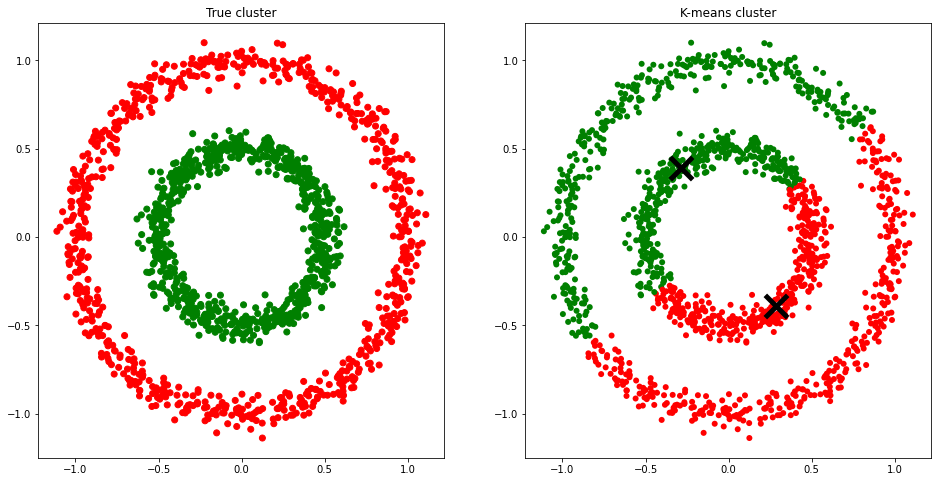

In [29]:
colors = ['red','green','blue']
X,y = noisy_circles
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)
clusters = Kmean.predict(X)
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = [colors[i] for i in y])
plt.title('True cluster')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], linewidth=0,c=[colors[i] for i in clusters])
plt.title('K-means cluster')
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=500, c='black', marker='x', linewidth = 5)
plt.savefig('k_means_fail_circle.pdf')

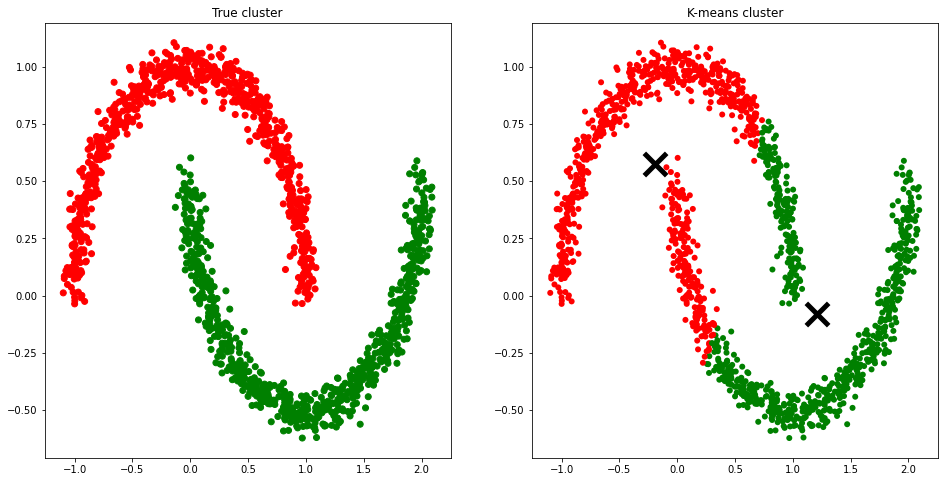

In [30]:
X,y= noisy_moons
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)
clusters = Kmean.predict(X)
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = [colors[i] for i in y])
plt.title('True cluster')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], linewidth=0,c=[colors[i] for i in clusters])
plt.title('K-means cluster')
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=500, c='black', marker='x', linewidth = 5)
plt.savefig('k_means_fail_moon.pdf')

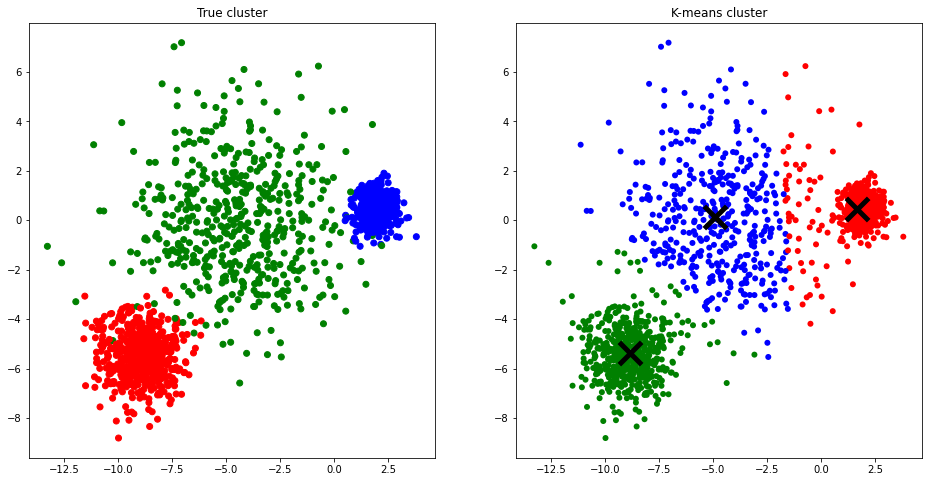

In [31]:
# Different variance
n_samples = 1500
random_state=170
X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
Kmean = KMeans(n_clusters=3, random_state=random_state)
clusters = Kmean.fit_predict(X)
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = [colors[i] for i in y])
plt.title('True cluster')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], linewidth=0,c=[colors[i] for i in clusters])
plt.title('K-means cluster')
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=500, c='black', marker='x', linewidth = 5)
plt.savefig('unequal_var.pdf')


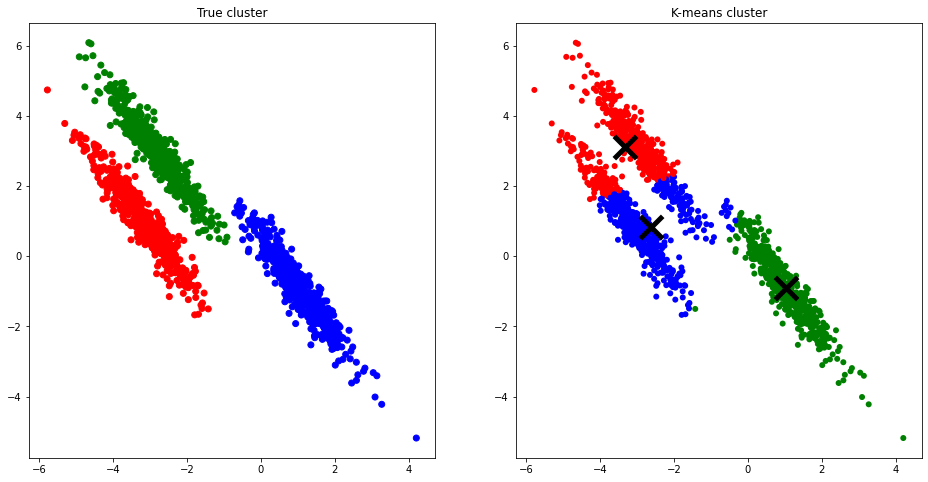

In [32]:
# Anisotropicly distributed data
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)
Kmean = KMeans(n_clusters=3, random_state=random_state)
clusters = Kmean.fit_predict(X)

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c = [colors[i] for i in y])
plt.title('True cluster')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], linewidth=0,c=[colors[i] for i in clusters])
plt.title('K-means cluster')
for cluster_x, cluster_y in Kmean.cluster_centers_:
    plt.scatter(cluster_x, cluster_y, s=500, c='black', marker='x', linewidth = 5)
plt.savefig('Anisotropic.pdf')




# Political Voting clustering

In [33]:
votes = np.loadtxt('%s/voting_record2005.txt'%(_DATA_DIR),dtype=str,delimiter='\t')
votes = pd.DataFrame(votes)

for i in range(votes.shape[1]-1):
    votes.iloc[:,i] = votes.iloc[:,i].astype('float')
    
votes = votes.iloc[:,:-1]

n = votes.shape[0]
m = votes.shape[1]

In [34]:
from scipy.spatial.distance import pdist

dist1 = pd.DataFrame(index = range(n), columns = range(n))
for i in range(n):
    for j in range(n):
        dist1.iloc[i,j] = float(pdist(votes.iloc[[i,j],:],'cityblock'))

In [35]:
W = pd.DataFrame(index = range(n), columns = range(n))
for i in range(n):
    W.iloc[:,i] = dist1.iloc[:,i].apply(lambda x: np.exp(-x/m))

In [36]:
G = np.diag(W.sum())
L = np.eye(n) - np.linalg.inv(G) @ W

In [37]:
eig_val,eig_vec =  np.linalg.eig(L)
eig_vec = pd.DataFrame(eig_vec)

In [38]:
eig_vec

,0,1,2,3,4,5,6,7,8,9,...,424,425,426,427,428,429,430,431,432,433
0,-0.048002,0.053587,-0.028014,0.004101,0.009409,-0.019777,-0.017259,-0.068064,0.028666,0.036998,...,0.051301,-0.001420,0.001400,-0.016354,0.005580,0.004797,0.010386,-0.007560,-0.023278,0.013226
1,-0.048002,0.060797,-0.052317,0.011052,0.020910,0.005040,0.025371,-0.029318,-0.038999,-0.044599,...,0.021974,-0.042757,-0.062920,-0.011534,-0.065367,-0.047867,0.049476,0.015166,0.002962,-0.008674
2,-0.048002,-0.046601,-0.002291,0.029476,0.048946,-0.014637,-0.022181,-0.001028,-0.011696,0.023069,...,0.120378,-0.023102,-0.049006,0.044483,0.033370,0.001203,0.009652,0.037697,0.040043,-0.014311
3,-0.048002,-0.049699,-0.019962,-0.098376,0.019784,0.030652,0.025774,0.004171,0.025216,-0.005399,...,0.017304,0.039825,0.090137,0.024859,-0.096818,0.016867,0.075223,0.018185,0.041558,-0.001411
4,-0.048002,-0.046228,-0.000274,0.043666,0.055038,-0.024246,-0.020491,0.014042,-0.010189,-0.002605,...,0.082231,-0.052689,-0.026030,-0.006863,-0.086757,0.022115,-0.028007,-0.021301,0.063477,-0.043470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,-0.048002,0.064166,-0.113758,0.004720,-0.015658,-0.022042,-0.115814,0.036470,0.020321,-0.104716,...,-0.034014,0.095422,0.110155,0.012339,-0.017740,-0.048150,-0.029196,0.055194,-0.012692,-0.092440
430,-0.048002,0.055011,0.020765,-0.006310,-0.010647,0.047024,-0.011535,0.052338,-0.092985,0.062659,...,0.043471,-0.011321,-0.010107,-0.012815,0.051326,-0.038675,-0.094822,0.010616,0.000852,-0.059704
431,-0.048002,0.049605,0.049148,-0.002827,0.030332,-0.015833,0.030087,-0.060805,0.068541,-0.066039,...,0.068644,0.047587,-0.038819,-0.076239,0.022600,0.024699,-0.018131,-0.054351,-0.041441,0.066961
432,-0.048002,-0.038122,-0.003968,0.029713,-0.000783,-0.042087,0.015324,0.014421,-0.010817,0.045475,...,0.005675,-0.042902,-0.016097,0.029835,-0.011278,0.009236,-0.022682,-0.018366,-0.009400,-0.010888


In [39]:
parties = np.loadtxt('%s/house_party2005.txt'%(_DATA_DIR),dtype=str,delimiter='\t')
parties = pd.DataFrame(parties).iloc[:-1,:]
parties.columns = ['Party']
parties = parties.astype('float')

In [40]:
members = np.loadtxt('%s/house_members2005.txt'%(_DATA_DIR),dtype=str,delimiter='\t')
members = pd.DataFrame(members)
members.columns = ['ID','Name','Group','State']

In [41]:
result = pd.DataFrame({'Name':members.Name,'second_eig': -eig_vec.iloc[:,1],'Group':members.Group})
result.sort_values('second_eig')

,Name,second_eig,Group
355,Schakowsky,-0.065527,D
429,Woolsey,-0.064166,D
229,Lee,-0.064044,D
11,Baldwin,-0.063970,D
275,"Miller, George",-0.063947,D
...,...,...,...
28,Blackburn,0.049626,R
136,Foxx,0.049632,R
3,Akin,0.049699,R
256,McHenry,0.050037,R


In [42]:
from sklearn.manifold import TSNE 

tsne = TSNE()
tsne.fit_transform(votes)
tsne = pd.DataFrame(tsne.embedding_, index = votes.index) 

G1 =parties[parties.Party ==1].index.tolist()
G2 =parties[parties.Party ==0].index.tolist()

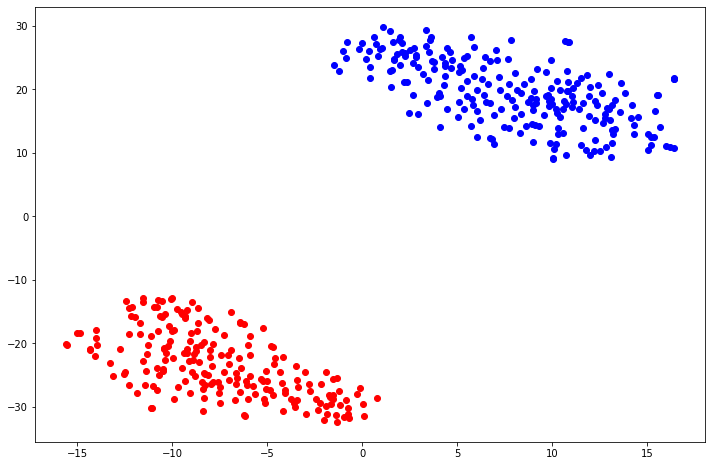

In [43]:
plt.figure(figsize = (12,8))
plt.plot(tsne.iloc[G1,0],tsne.iloc[G1,1],'o',c = 'red')
plt.plot(tsne.iloc[G2,0],tsne.iloc[G2,1],'o',c = 'blue')
plt.savefig('tsne.pdf')
plt.show()

# Hierarchical clustering

In [44]:
df = pd.read_csv("%s/Word_Weights_By_Topic_Phi.csv"%(_DATA_DIR),index_col = 0)

In [45]:
df.index.name = "topic"
df = df.T

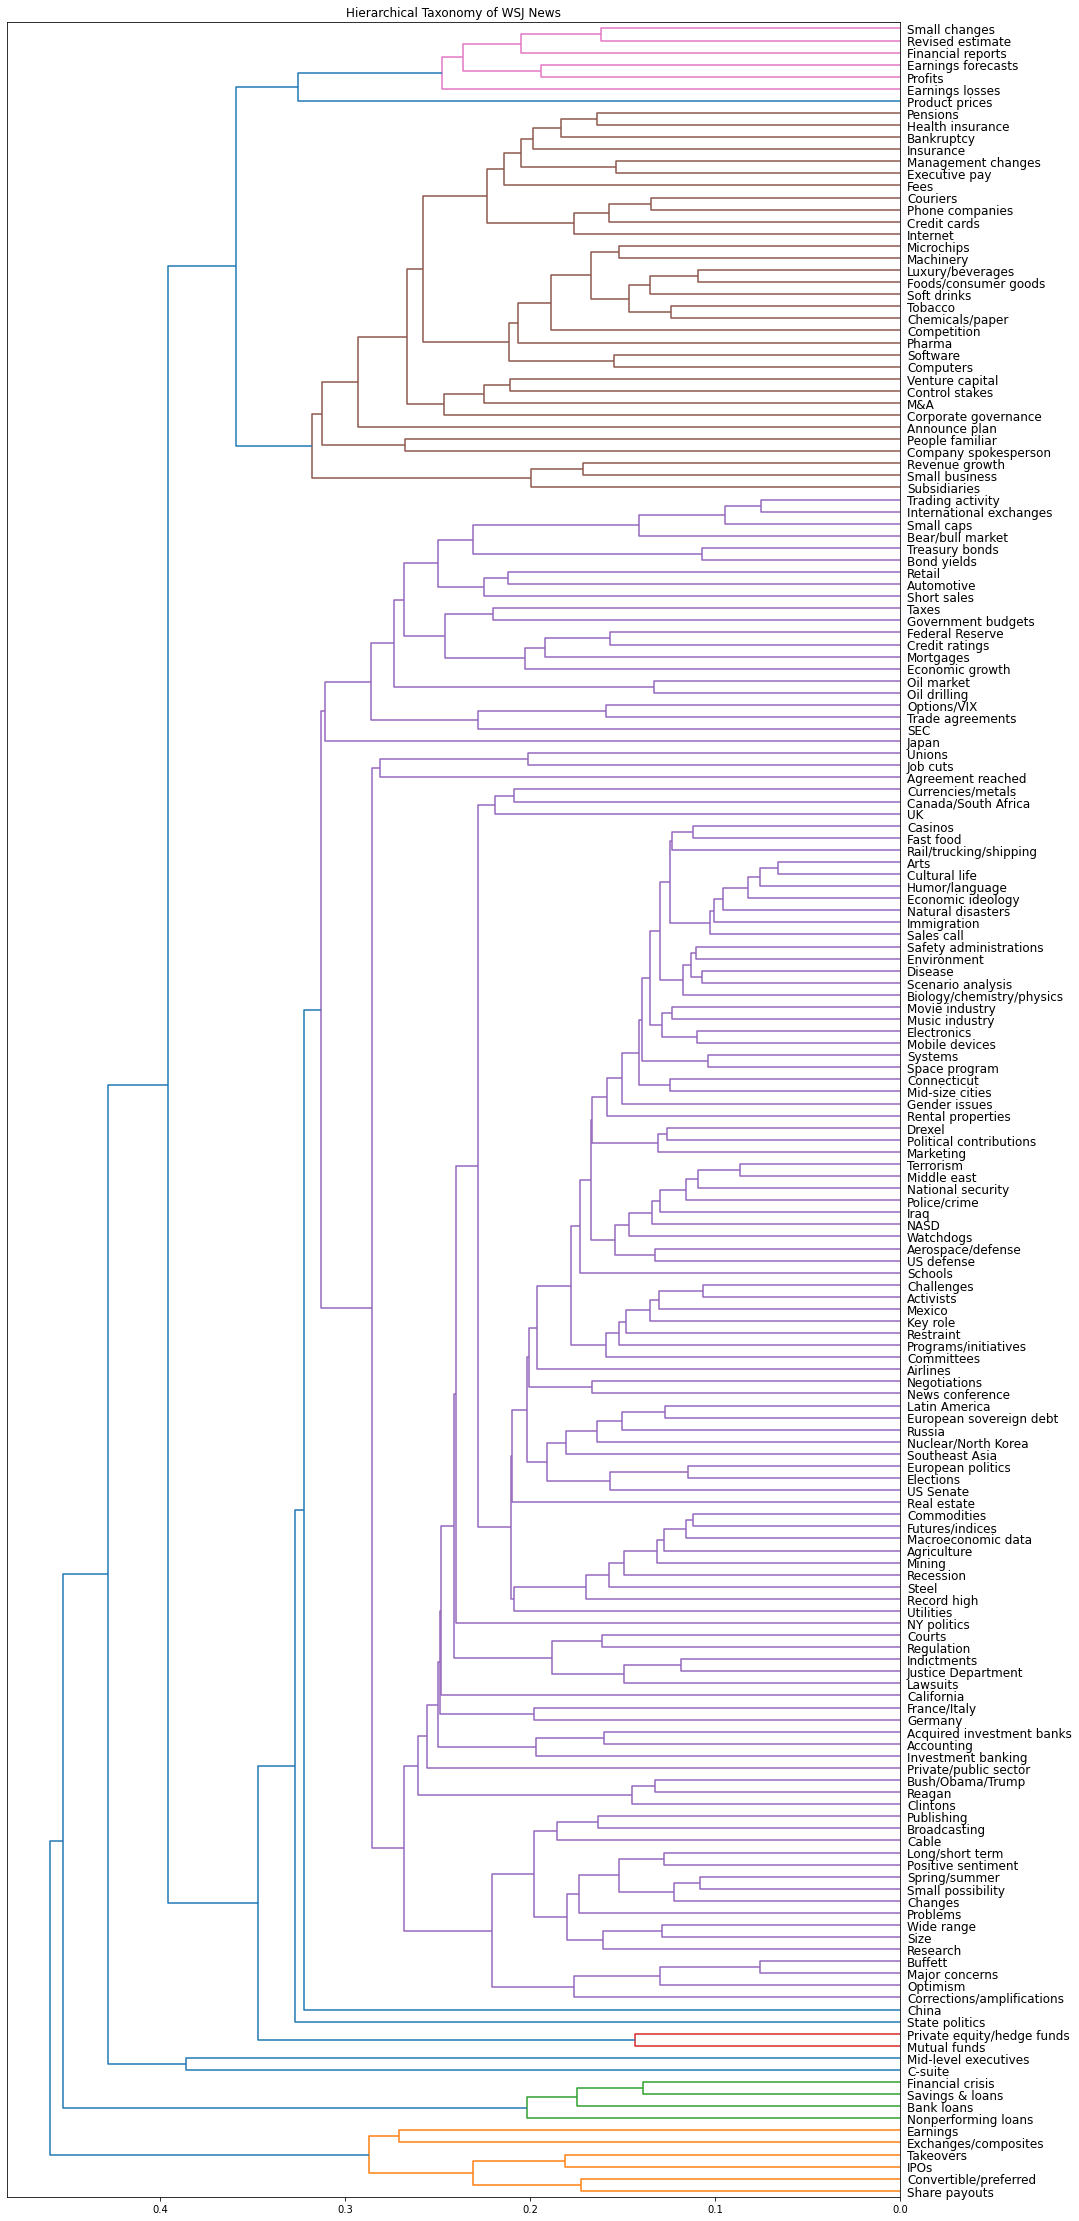

In [46]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (16,40))
plt.title("Hierarchical Taxonomy of WSJ News")  
dend = shc.dendrogram(shc.linkage(df, method='ward'),labels=df.index,orientation='left',leaf_font_size = 12)